In [15]:
%matplotlib inline

import pr_util as util
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def all_dirs(full_or_pulse = 'full'):
    # Return list of directories with species randomly choosen
    dirs = []
    for i in range(len(util.NAME_SPECIES_NUM_DIR)):
        specie = util.NAME_SPECIES_NUM_DIR[i]
        if full_or_pulse == 'full':
            dir = util.DATA_DIR_BASE + '-' + specie[-1] + '/' + specie[:-2] + '/'
        else:
            dir = util.DATA_DIR_PULSE_BASE + '-' + specie[-1] + '/' + specie[:-2] + '/'
        dirs.append(dir)
    return dirs


In [7]:
dirs = all_dirs()

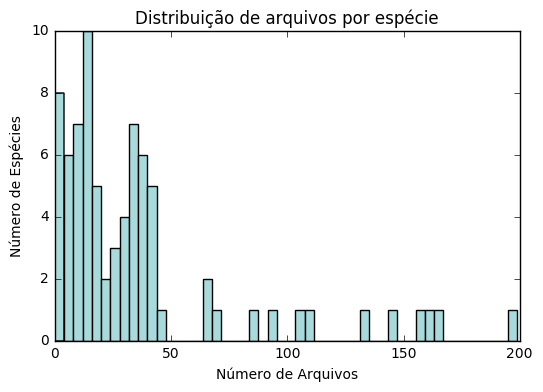

In [38]:
num_files = []

for dir in dirs:
    num_files.append(util.num_files([dir], 'song'))

num_files = np.array(num_files)

plt.hist(num_files,bins=50, color='#A8DADC')  # arguments are passed to np.histogram
plt.title("Distribuição de arquivos por espécie")
plt.xlabel("Número de Arquivos")
plt.ylabel("Número de Espécies")
plt.show()


In [21]:
num_files
print(num_files)
print(np.histogram(num_files, bins=20))

[ 23  11  13  14  33  29  39   8  11  39  19  33  41   2   4  12  27  27
   1  12  10   9  14  11  28  42  12  44   2   7  30  65  33   3  17   8
  42  17   3  32  32  37  16   5  12  35   4   1  13  36   2  32  37  14
  43  37  27  19   7  43 146  12 167   6  21 199  31   0 158  66 133  71
  84  92 111 106 160]
(array([17, 19,  7, 15,  6,  0,  2,  1,  1,  1,  1,  1,  0,  1,  1,  1,  2,
        0,  0,  1]), array([   0.  ,    9.95,   19.9 ,   29.85,   39.8 ,   49.75,   59.7 ,
         69.65,   79.6 ,   89.55,   99.5 ,  109.45,  119.4 ,  129.35,
        139.3 ,  149.25,  159.2 ,  169.15,  179.1 ,  189.05,  199.  ]))
